In [59]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
from scipy import stats

import statsmodels.api as sma

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier


from sklearn.preprocessing import *
from sklearn.model_selection import *


from sklearn.metrics import *

In [2]:
df=pd.read_csv('bank-full.csv',sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
df.shape

(45211, 17)

In [4]:
df.size

768587

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
num=df.select_dtypes(include=np.number).columns.to_list()
num

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [7]:
cat=df.select_dtypes(include=object).columns.to_list()
cat

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

## 5 point summary

In [8]:
df[num].describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [9]:
df[cat].describe()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


## Univariant Analysis

## Numeric

In [10]:
df[num].skew()

age          0.684818
balance      8.360308
day          0.093079
duration     3.144318
campaign     4.898650
pdays        2.615715
previous    41.846454
dtype: float64

In [11]:
## the Data in the numeric column are positively skewed.

In [12]:
df[num].kurt()

age            0.319570
balance      140.751547
day           -1.059897
duration      18.153915
campaign      39.249651
pdays          6.935195
previous    4506.860660
dtype: float64

## visualize the distribution of all the numerical columns and cat variables

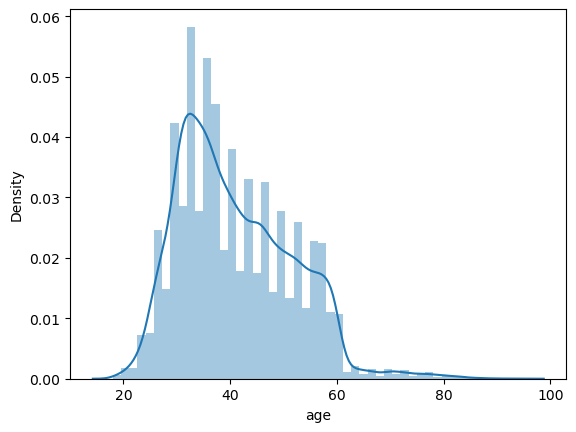

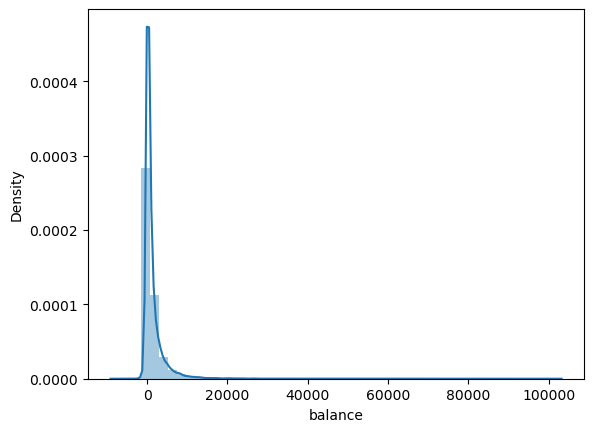

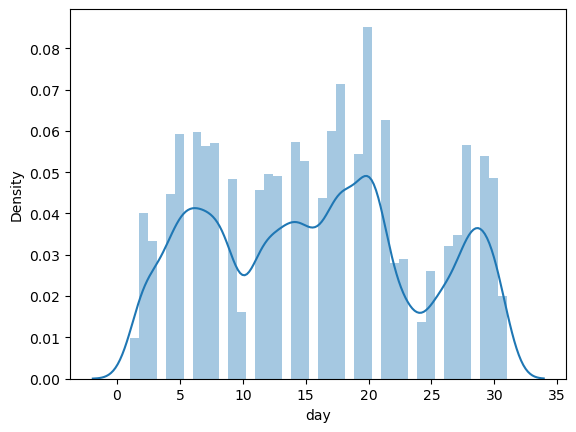

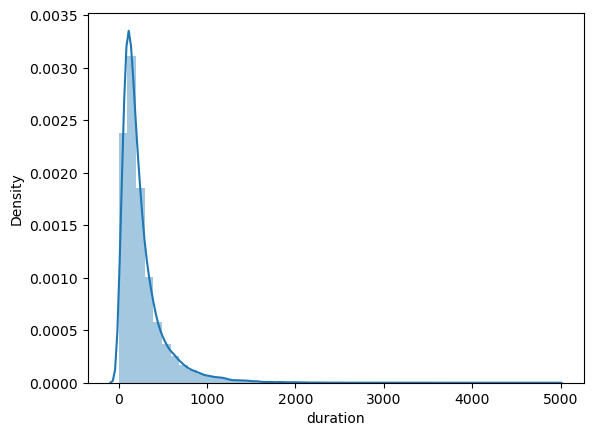

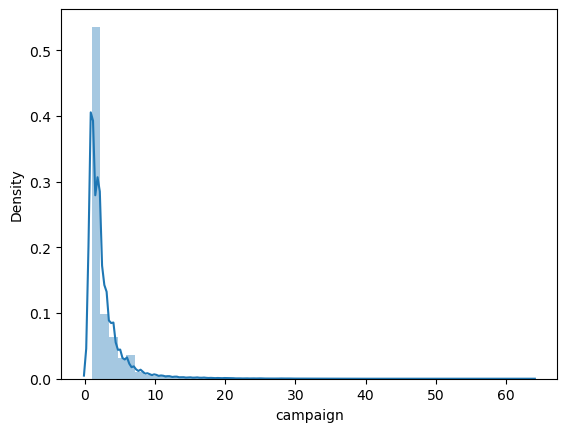

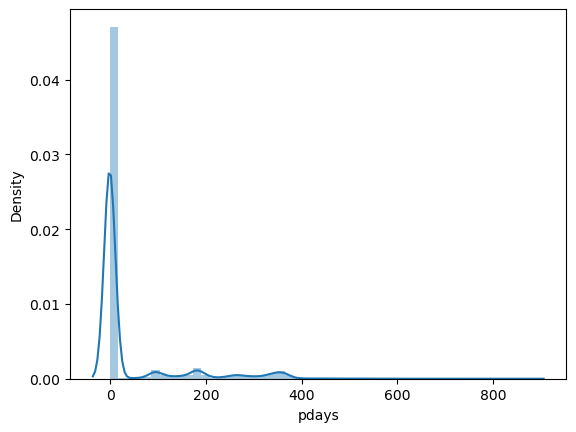

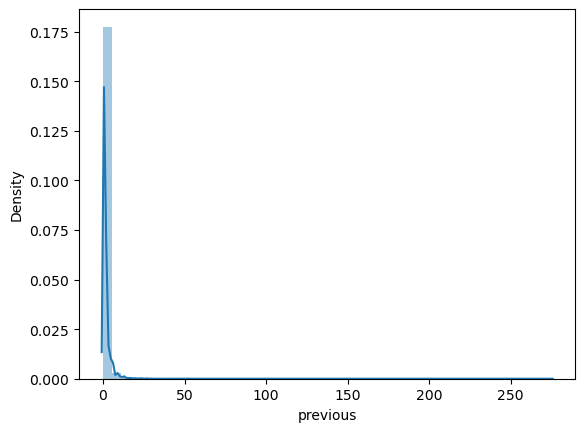

In [13]:
for i in num:
    sns.distplot(df[i])
    plt.show()

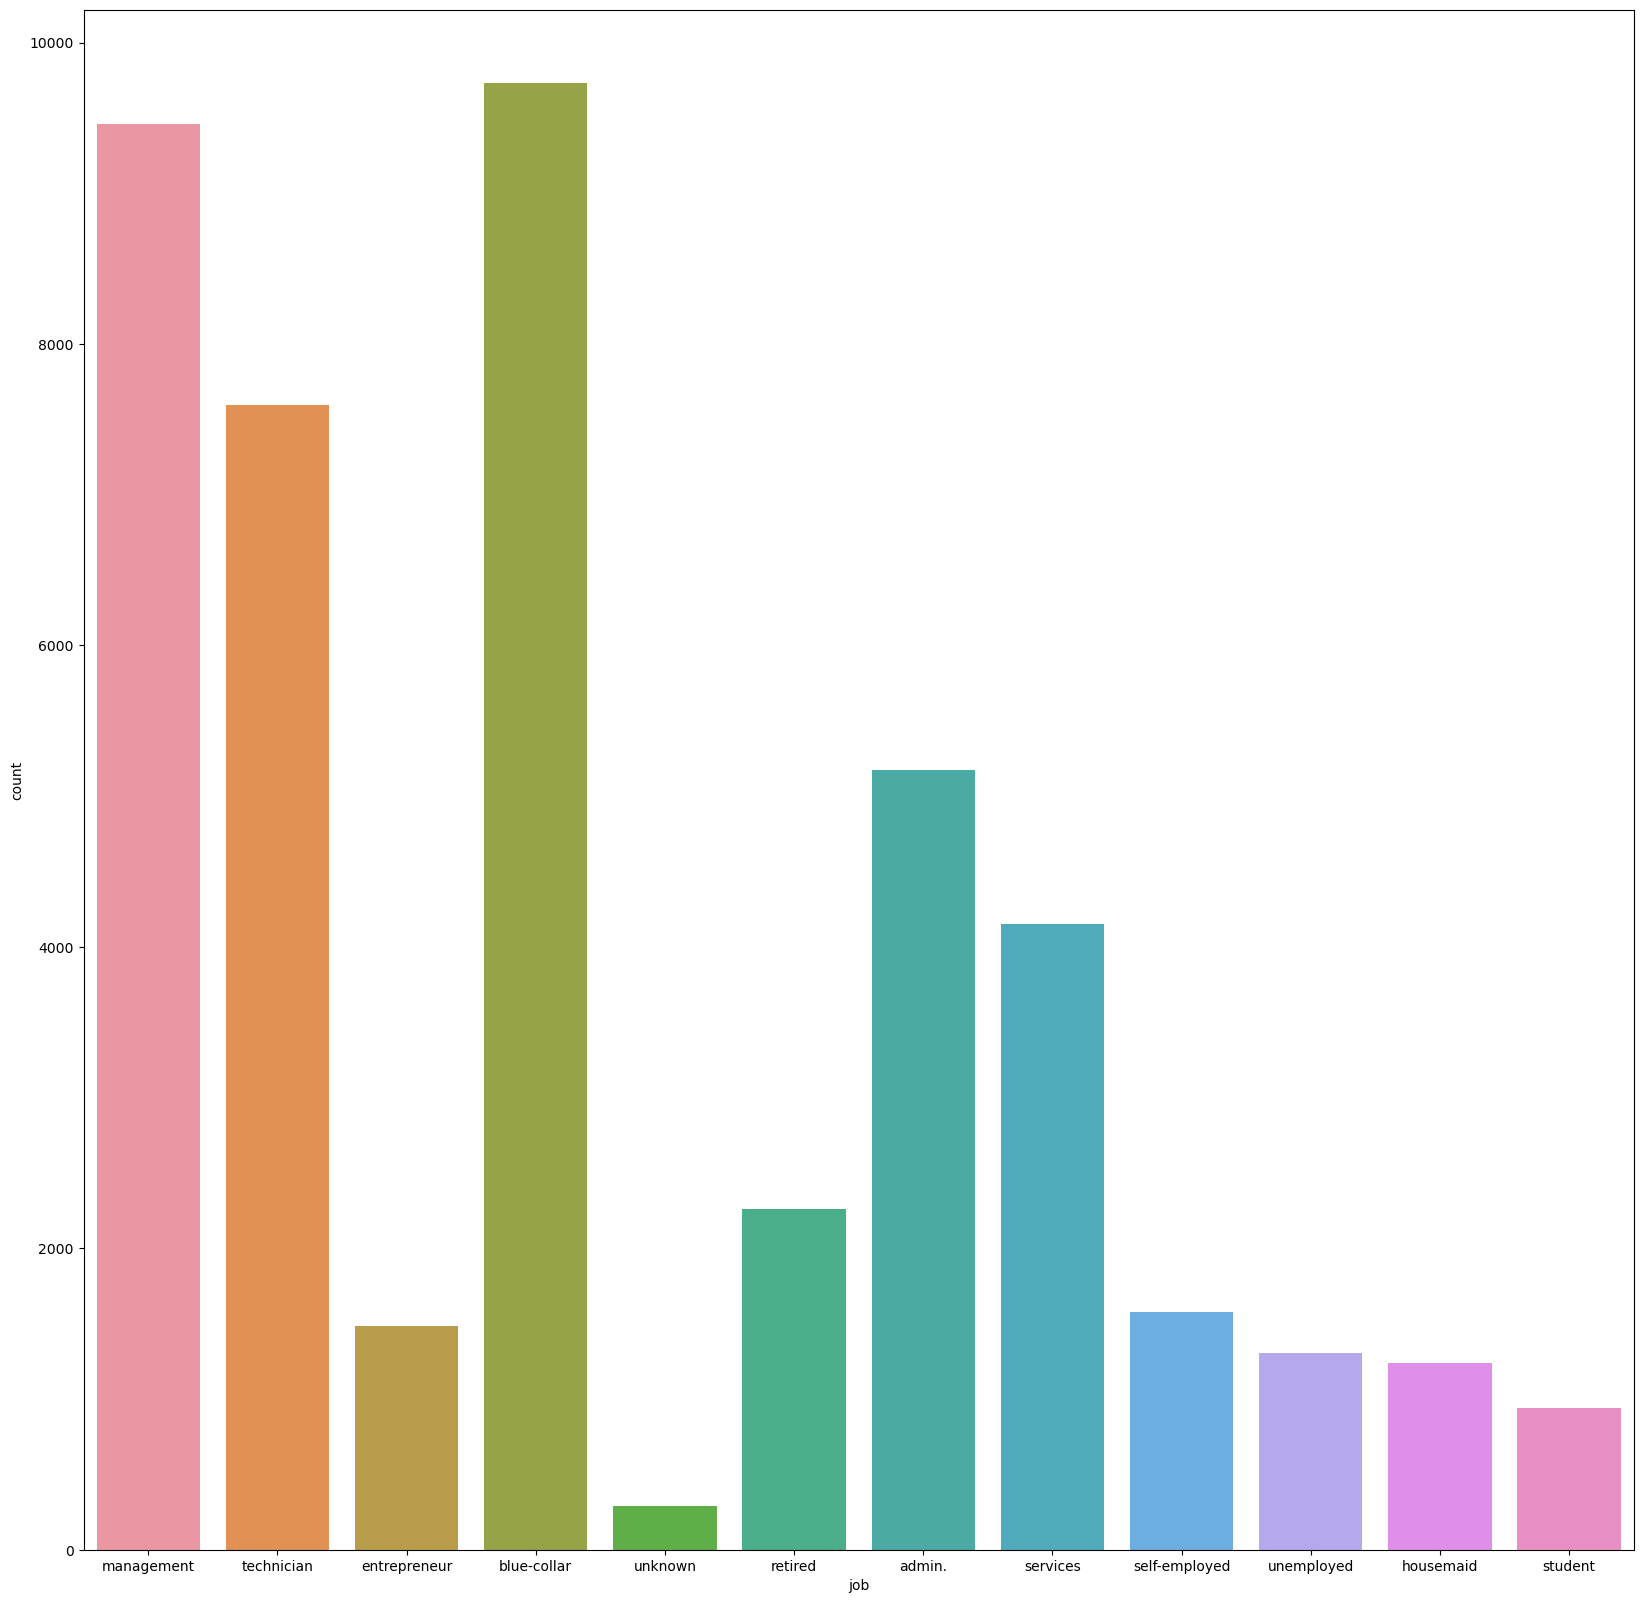

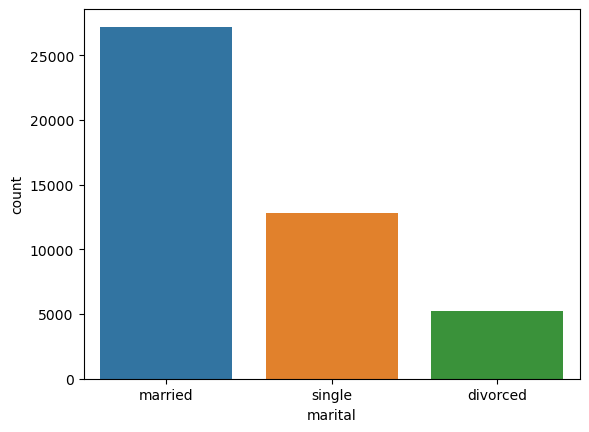

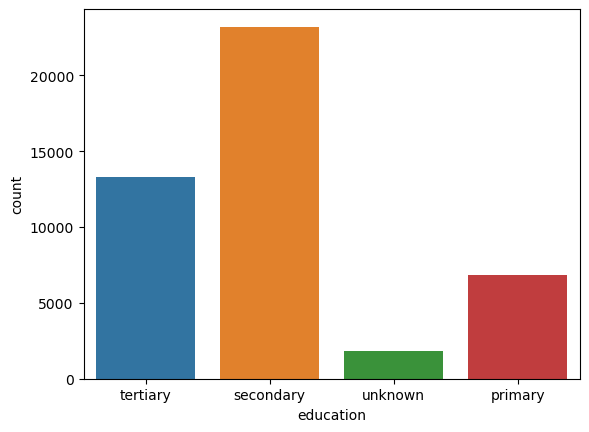

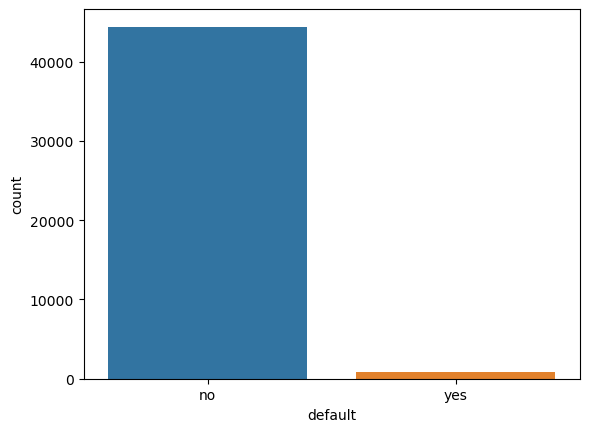

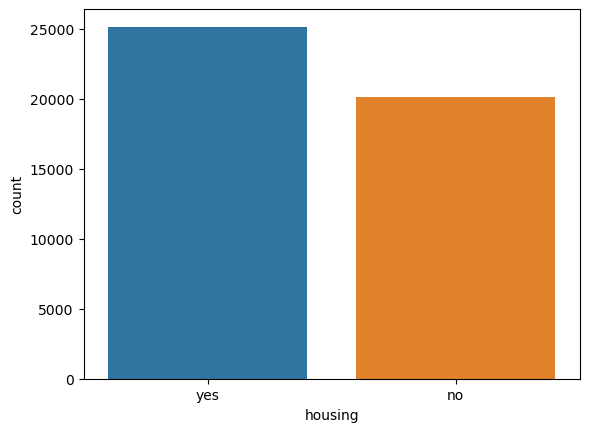

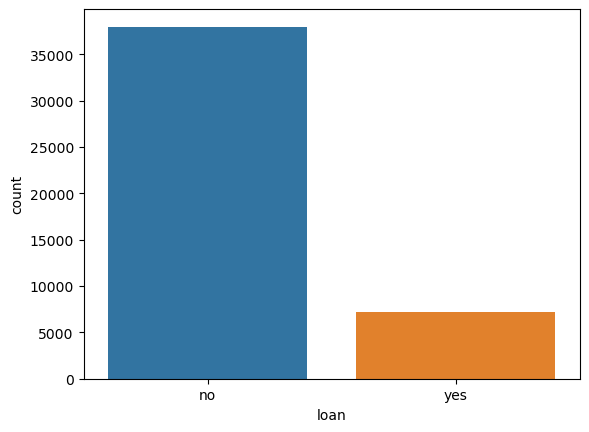

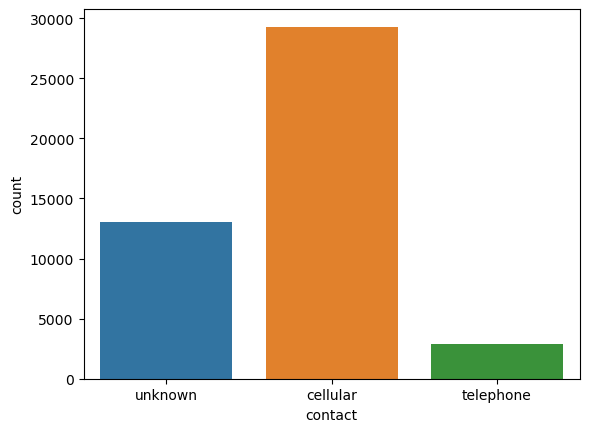

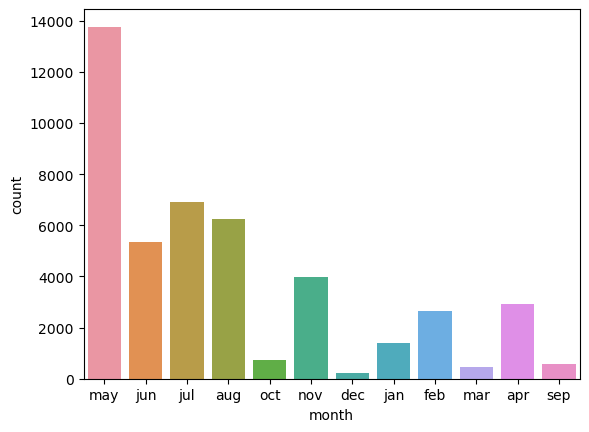

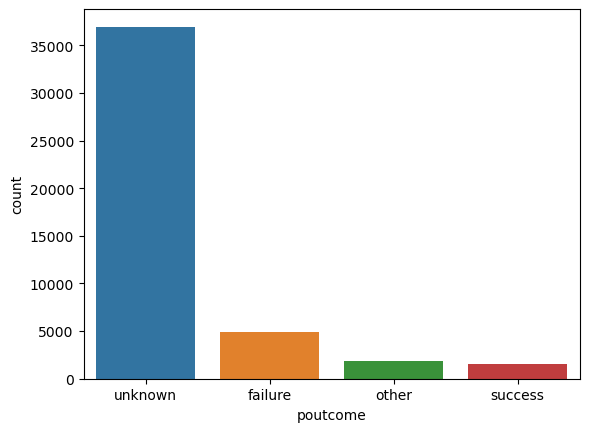

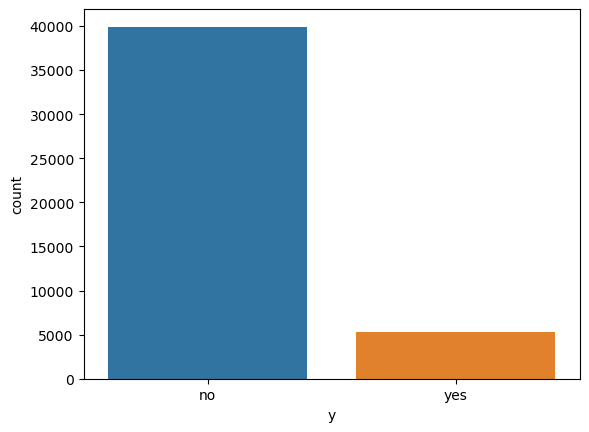

In [14]:
plt.figure(figsize=(20,20))
for i in cat:
    sns.countplot(x=df[i])
    plt.show()

In [15]:
## The data set is not balanced 

## Outliers

<Axes: >

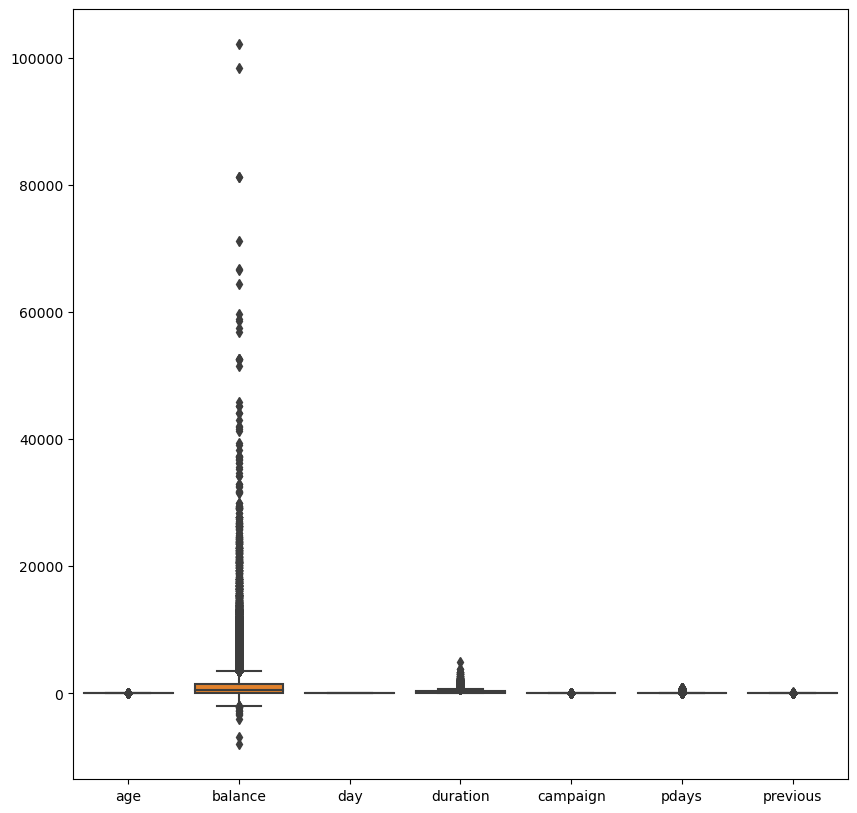

In [16]:
plt.figure(figsize=(10,10))
sns.boxplot(df)

In [17]:
num

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [18]:
def finding_outliers(data):
    outliers=[]
    data=sorted(data)
    
    q1=np.percentile(data,25)
    q3=np.percentile(data,75)
    
    IQR=q3-q1
    
    ll=q1-(1.5*IQR)
    ul=q3+(1.5*IQR)
    
    for i in data:
        if (i<ll or i>ul):
            outliers.append(i)
    return outliers


for i in df[num]:
    outliers_list=finding_outliers(df[i])
    print('outliers in',i,'feature :',outliers_list)

outliers in age feature : [71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 7

In [19]:
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [20]:
find_outliers_IQR(df[num])

,age,balance,day,duration,campaign,pdays,previous
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
45206,NaN,NaN,NaN,977.0,NaN,NaN,NaN
45207,71.0,NaN,NaN,NaN,NaN,NaN,NaN
45208,72.0,5715.0,NaN,1127.0,NaN,184.0,3.0
45209,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are outliers present in the data set since the outliers are more in 
balance column so we iam not going to treat the outliers

## Bivariant Analysis

## Numerical Vs Numerical

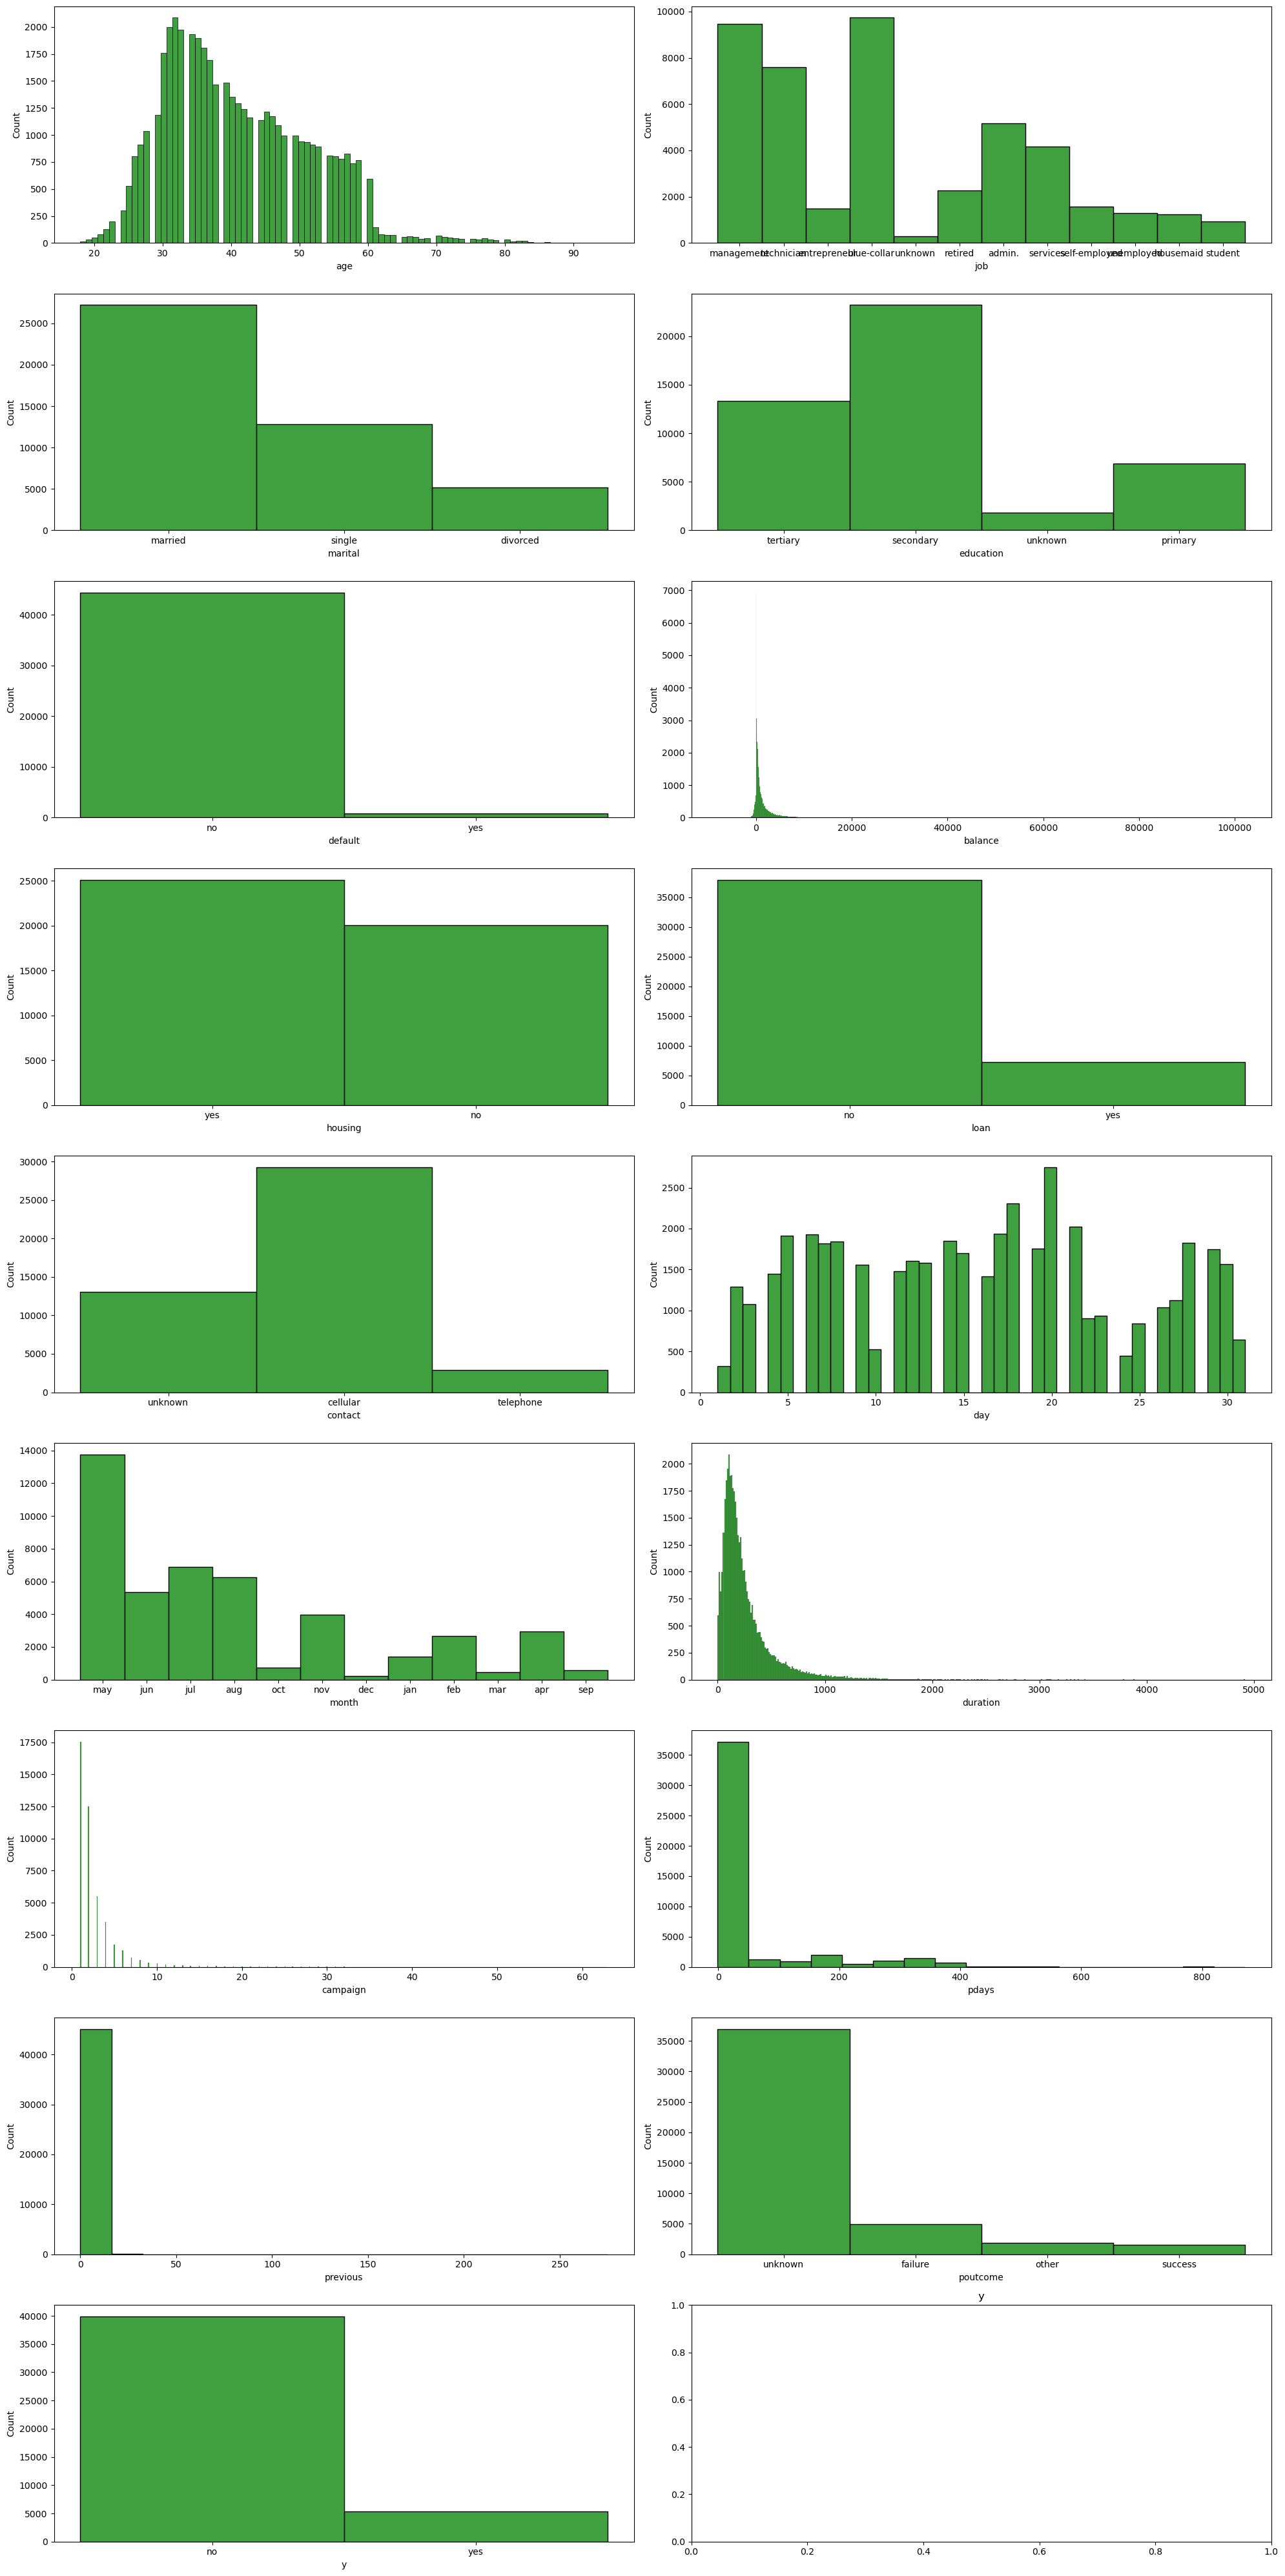

In [21]:
fig,ax=plt.subplots(9,2 , figsize=(20,40))

for i ,subplot in zip(df,ax.flatten()):
    sns.histplot(df[i],ax=subplot,color='green')
    plt.title(i)
plt.tight_layout()    
plt.show()

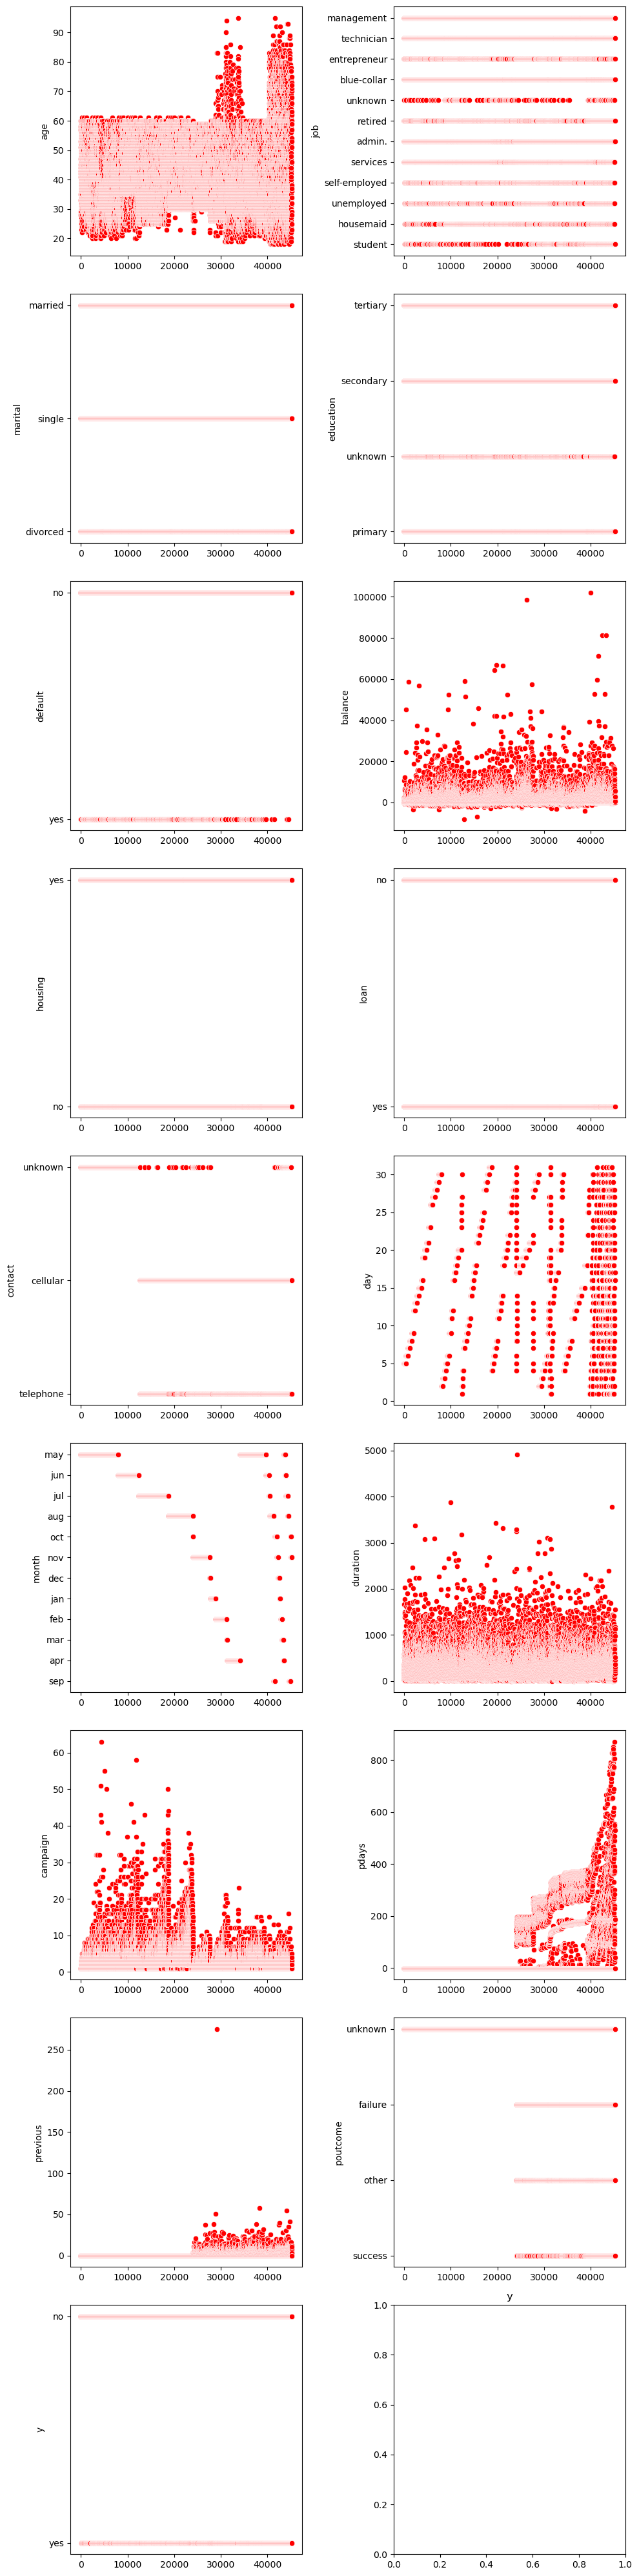

In [23]:
fig,ax=plt.subplots(9,2 , figsize=(10,40))

for i ,subplot in zip(df,ax.flatten()):
    sns.scatterplot(df[i],ax=subplot,color='red')
    plt.title(i)
plt.tight_layout()    
plt.show()

## Numerical Vs categorical

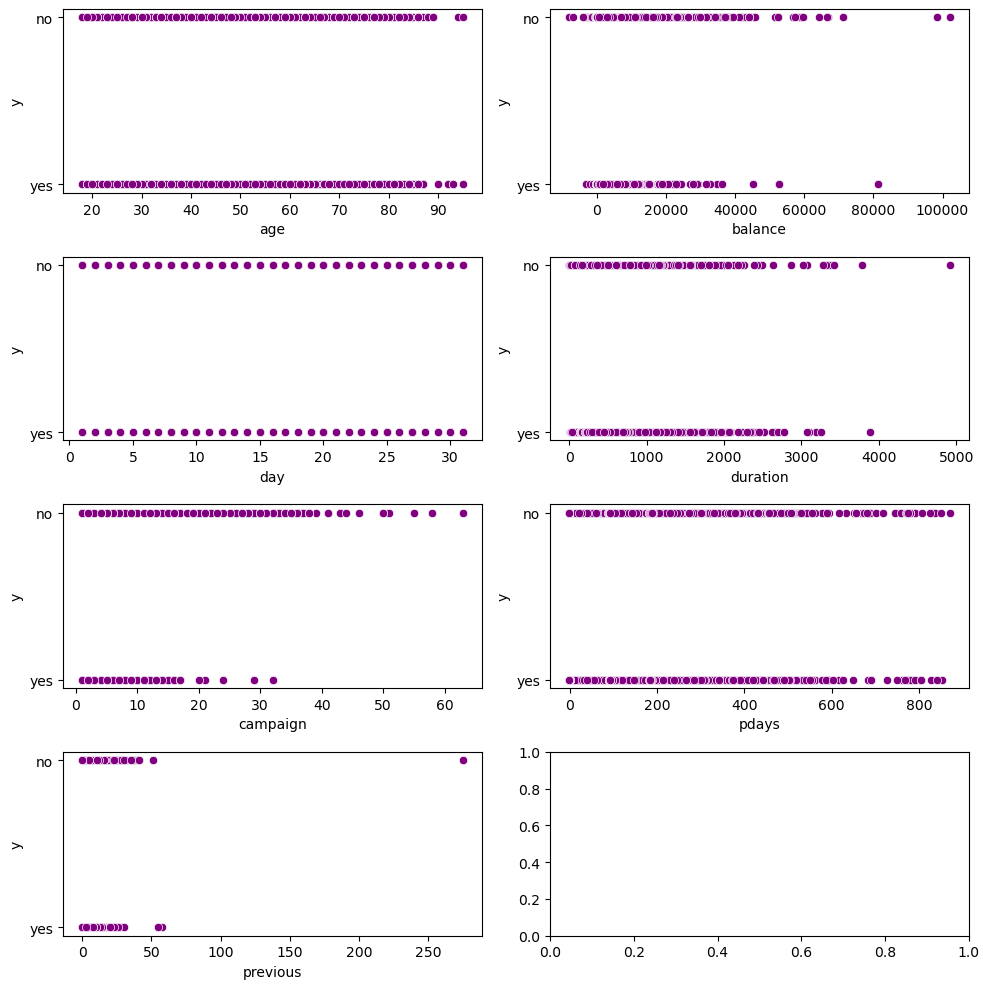

In [24]:
fig, ax= plt.subplots(4,2, figsize=(10,10))

for i, subplot in zip(num, ax.flatten()):
    sns.scatterplot(x=df[i],y=df.y, ax=subplot,color='purple')
    #plt.title('df[i]')

plt.tight_layout()
plt.show()

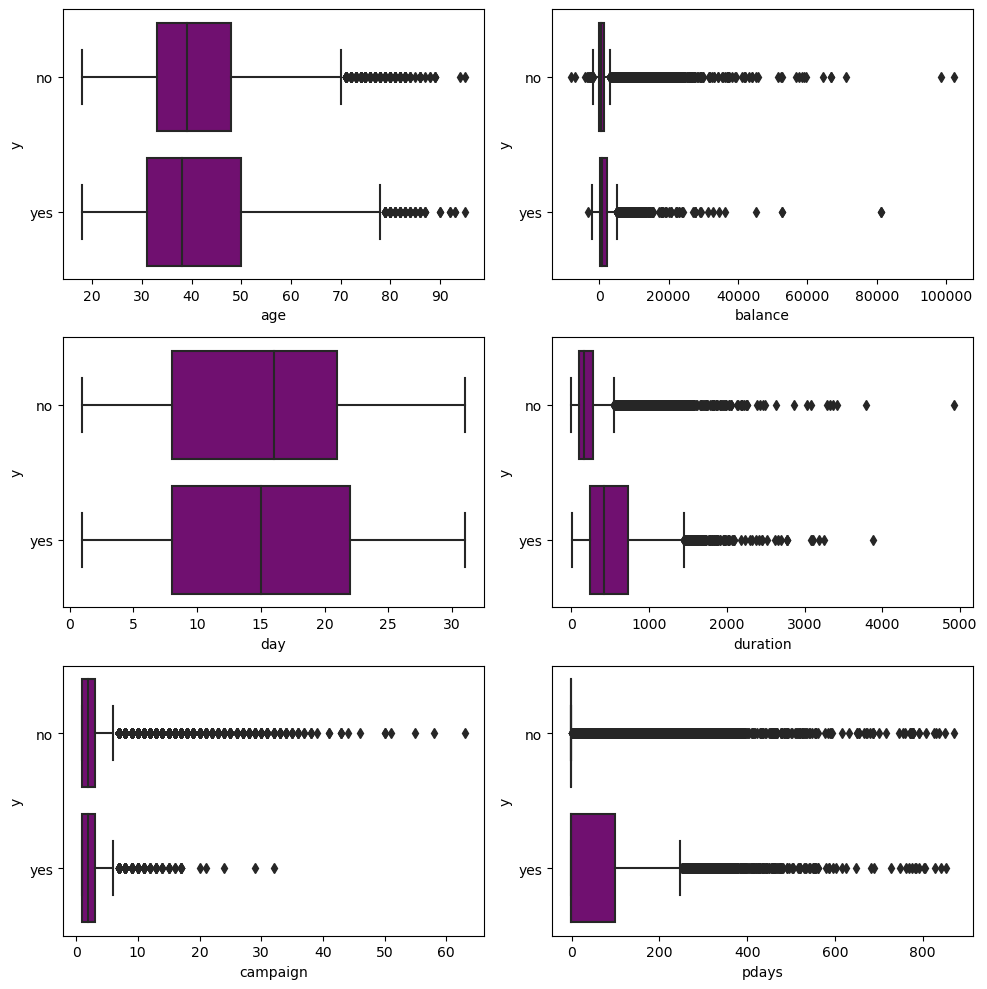

In [25]:
fig, ax= plt.subplots(3,2, figsize=(10,10))

for i, subplot in zip(num, ax.flatten()):
    sns.boxplot(x=df[i],y=df.y, ax=subplot,color='purple')
    #plt.title('df[i]')

plt.tight_layout()
plt.show()

In [26]:
df.isnull().sum()/df.shape[0]*100

age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
poutcome     0.0
y            0.0
dtype: float64

 no null values present un the dataset

In [27]:
## heatmap

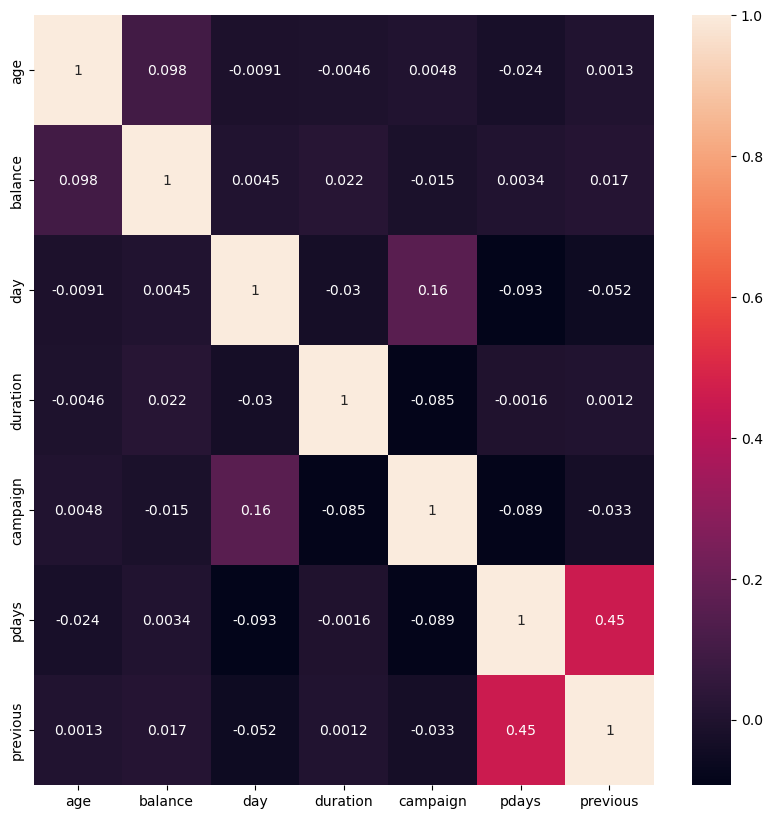

In [28]:
plt.figure(figsize=(10,10))
sns.heatmap(df[num].corr(),annot=True)
plt.show()

In [29]:
##There is no multicollinearity between independend variable except pdays and previous variables

## Encoding

In [30]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [31]:
def uni(cat):
    for i in df[cat]:
        print(i,df[i].unique())

In [33]:
uni(cat)

job ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital ['married' 'single' 'divorced']
education ['tertiary' 'secondary' 'unknown' 'primary']
default ['no' 'yes']
housing ['yes' 'no']
loan ['no' 'yes']
contact ['unknown' 'cellular' 'telephone']
month ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome ['unknown' 'failure' 'other' 'success']
y ['no' 'yes']


In [34]:
df.default=df.default.replace({'no':0,'yes':1})

In [37]:
df.housing=df.housing.replace({'no':0,'yes':1})
df.loan=df.loan.replace({'no':0,'yes':1})
df.y=df.y.replace({'no':0,'yes':1})

In [41]:
# Encoding the job , marital education ,contact , month , poutcome 
df = pd.get_dummies(df,drop_first=True)

In [42]:
df

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,261,1,-1,0,...,False,False,False,True,False,False,False,False,False,True
1,44,0,29,1,0,5,151,1,-1,0,...,False,False,False,True,False,False,False,False,False,True
2,33,0,2,1,1,5,76,1,-1,0,...,False,False,False,True,False,False,False,False,False,True
3,47,0,1506,1,0,5,92,1,-1,0,...,False,False,False,True,False,False,False,False,False,True
4,33,0,1,0,0,5,198,1,-1,0,...,False,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,977,3,-1,0,...,False,False,False,False,True,False,False,False,False,True
45207,71,0,1729,0,0,17,456,2,-1,0,...,False,False,False,False,True,False,False,False,False,True
45208,72,0,5715,0,0,17,1127,5,184,3,...,False,False,False,False,True,False,False,False,True,False
45209,57,0,668,0,0,17,508,4,-1,0,...,False,False,False,False,True,False,False,False,False,True


In [45]:
df=df.replace({False:0,True:1})

In [46]:
df

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
1,44,0,29,1,0,5,151,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
2,33,0,2,1,1,5,76,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
3,47,0,1506,1,0,5,92,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
4,33,0,1,0,0,5,198,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,977,3,-1,0,...,0,0,0,0,1,0,0,0,0,1
45207,71,0,1729,0,0,17,456,2,-1,0,...,0,0,0,0,1,0,0,0,0,1
45208,72,0,5715,0,0,17,1127,5,184,3,...,0,0,0,0,1,0,0,0,1,0
45209,57,0,668,0,0,17,508,4,-1,0,...,0,0,0,0,1,0,0,0,0,1


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   default              45211 non-null  int64
 2   balance              45211 non-null  int64
 3   housing              45211 non-null  int64
 4   loan                 45211 non-null  int64
 5   day                  45211 non-null  int64
 6   duration             45211 non-null  int64
 7   campaign             45211 non-null  int64
 8   pdays                45211 non-null  int64
 9   previous             45211 non-null  int64
 10  y                    45211 non-null  int64
 11  job_blue-collar      45211 non-null  int64
 12  job_entrepreneur     45211 non-null  int64
 13  job_housemaid        45211 non-null  int64
 14  job_management       45211 non-null  int64
 15  job_retired          45211 non-null  int64
 16  job_self-employed    4

## Model building

In [48]:
## train test split

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,f1_score,precision_score,recall_score,classification_report

In [50]:
X = df.drop(df[['y']],axis = 1 )
y = df['y']

In [51]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=10)

In [52]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(36168, 42)
(36168,)
(9043, 42)
(9043,)


## Build the Decision Tree model using sklearn

In [53]:
dt = DecisionTreeClassifier()
dt.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [54]:
dt_pred_train = dt.predict(xtrain)

In [55]:
dt_pred = dt.predict(xtest)

## Classification report of train set , test set and whole data set

In [56]:
print(classification_report(ytrain,dt_pred_train))
print(classification_report(ytest,dt_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     31928
           1       1.00      1.00      1.00      4240

    accuracy                           1.00     36168
   macro avg       1.00      1.00      1.00     36168
weighted avg       1.00      1.00      1.00     36168

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      7994
           1       0.47      0.48      0.47      1049

    accuracy                           0.88      9043
   macro avg       0.70      0.70      0.70      9043
weighted avg       0.88      0.88      0.88      9043



In [57]:
print("accuracy_score",accuracy_score(ytest,dt_pred))
print("precision_score",precision_score(ytest,dt_pred))
print("recall_score", recall_score(ytest,dt_pred))
print("f1_Score",f1_score(ytest,dt_pred))

accuracy_score 0.8759261307088355
precision_score 0.4663594470046083
recall_score 0.48236415633937085
f1_Score 0.4742268041237113


model performs reasonably well on class 0 (with precision, recall, and F1-score around 0.93), but poorly on class 1 (with precision, recall, and F1-score around 0.47). This indicates that the second model struggles particularly with identifying instances of class 1, resulting in lower performance metrics for this class.

## Hyperparameter tuning:

In [60]:
param_grid = [{"criterion" : ["gini","entropy"],"min_samples_split" :[2,3,4],"max_depth": [2,3,4],
              "min_samples_leaf":[1,2,3]}]

estimator = DecisionTreeClassifier()

hyp_tun = GridSearchCV(estimator,param_grid)
hyp_tun.fit(xtrain,ytrain)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [2, 3, 4], 'min_samples_leaf': [1, 2, 3],
                          'min_samples_split': [2, 3, 4]}])

In [61]:
hyp_tun.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [64]:
dt = DecisionTreeClassifier(criterion= 'gini',max_depth = 3,min_samples_leaf = 1,min_samples_split= 2)

dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)


print("accuracy_score",accuracy_score(ytest,ypred))
print("precision_score",precision_score(ytest,ypred))
print("recall_score", recall_score(ytest,ypred))
print("f1_Score",f1_score(ytest,ypred))

accuracy_score 0.8992590954329316
precision_score 0.6391129032258065
recall_score 0.30219256434699715
f1_Score 0.4103559870550162


In [65]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7994
           1       0.64      0.30      0.41      1049

    accuracy                           0.90      9043
   macro avg       0.78      0.64      0.68      9043
weighted avg       0.88      0.90      0.88      9043



## Interpretation

The model performs well in predicting class 0, as indicated by high precision, recall, and F1-score for class 0.
However, the model's performance is notably poorer for class 1, with lower precision, recall, and F1-score values. This indicates that the model struggles more to correctly identify instances of class 1.
The overall accuracy of the model is 0.90, indicating that 90% of the instances were correctly classified.
The macro average F1-score is 0.68, which provides a balanced measure of the model's performance across both classes.